<h2>Let's Start<h2>

Lets first discuss what we are given and what we have to predict.
About our dataset :

We have in our training data :- 
1. date - every date of items sold
2. date_block_num - this number given to every month
3. shop_id - unique number of every shop
4. item_id - unique number of every item
5. item_price - price of every item
6. item_cnt_day - number of items sold on a particular day 

We have in our testing data :- 
1. ID - unique for every (shop_id,item_id) pair.
2. shop_id - unique number of every shop
3. item_id - unique number of every item

Now what we have to predict ?
we have to predict how many items of a type from each shop  will be sold in a whole month.
Our submission should have ID and item_cnt_month columns.

What is our approach?
our approach will be simple.
Our features will be number of items sold in month from a shop excluding last month data because that will our labels, that we help our model learn to predict next sequence. And for testing will use number of items sold in month from a shop excluding first month like this dimension of our data remains same. Our model will predict the next sequence and that we will be our results. This is pretty simple approach but its good for start. Please try some different approaches also. 
And please let me know if I did something wrong. If you like it please vote it up.


<h3>I would appreciate if you could upvote this kernel.<h3>

First of all as we know import required libraries

In [15]:
import numpy as np
import pandas as pd 
import os

In [16]:
#loading data 
os.listdir('../tmp')
sales_data = pd.read_csv('../tmp/12_141691_trainData.csv')
test_data = pd.read_csv('../tmp/12_141691_validationData.csv')


In [17]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    
    

In [18]:
#Litle bit of exploration of data

print("=============================Sales Data=============================")
basic_eda(sales_data)
print("=============================Test data=============================")
basic_eda(test_data)



=============================Sales Data=============================
----------TOP 5 RECORDS--------
   Unnamed: 0  Year  Month  Day  Week  Holiday  Celebration  LOWTEMP  \
0           0  2019      1    1     2        1            6        8   
1           1  2019      1    2     3        0            0        8   
2           2  2019      1    3     4        0            0        9   
3           3  2019      1    4     5        0            0       11   
4           4  2019      1    5     6        1           36        9   

   HIGHTEMP  SKY  STOREID  PRODUCTID  ENTRY  COVID19  TARGET  
0         8   18       12     141691  74918        0  38.338  
1         7   18       12     141691  76772        0  23.720  
2         9   17       12     141691  80331        0  24.698  
3        15    5       12     141691  85491        0  21.669  
4        10   36       12     141691  86558        0  40.014  
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 en

In [19]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [77]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [76]:
time = sales_data['Unnamed: 0'].values
type(time)
print(time)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [90]:
series = sales_data['TARGET'].values
type(series)
print(series)

[38.338 23.72  24.698 21.669 40.014 55.798 27.598 22.769 22.159 19.055
 14.421 35.984 17.803 21.929 21.945 18.623 38.122 24.126 37.002 42.417
 30.817 20.083 12.869 18.179 20.162 43.154 45.836 24.889 33.699 20.259
 28.449 29.758 62.188 61.788 23.058 10.016 17.39  19.523 25.98  41.58
 62.812 34.112 24.274 14.897 23.704 10.984 19.981 39.872 14.356 18.963
 19.845 13.102 15.837 36.489 51.117 19.924 31.039 18.126 26.288 25.24
 28.53  45.107 26.165 16.378 29.913 22.629 35.176 51.543 43.402 34.387
 28.516 20.849 16.172 14.026 33.967 40.009 22.001 24.264 23.522 18.954
 19.83  39.559 53.035 23.724 25.476 13.314 17.253 19.989 31.726 35.617
 22.818 23.68  21.975 32.336 18.592 32.022 22.839 19.941  0.608 21.565
 12.267 19.434 28.629 37.889 29.998 18.101 23.905 17.474 17.471 35.82
 31.66  18.881 16.616 18.367 17.719 16.258 37.78  32.652 20.109 19.694
 30.498 13.979 18.569 24.932 35.485 21.029 57.288 13.64  17.125 26.457
 31.91  21.936 21.067 21.888 20.872 13.547 29.496 45.289 40.083 16.854
 17.916 1

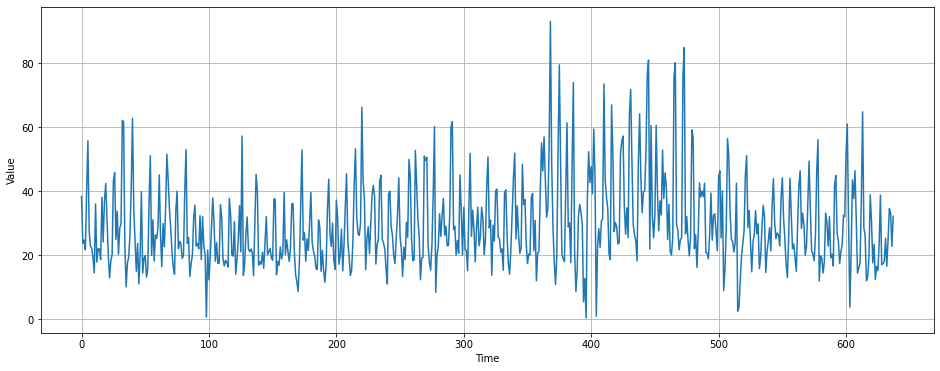

In [80]:
plt.figure(figsize=(16, 6))
plot_series(time, series)

In [89]:
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset = dataset.window(8, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(8))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[38.338 23.72  24.698 21.669 40.014 55.798 27.598] [22.769]
[23.72  24.698 21.669 40.014 55.798 27.598 22.769] [22.159]
[24.698 21.669 40.014 55.798 27.598 22.769 22.159] [19.055]
[21.669 40.014 55.798 27.598 22.769 22.159 19.055] [14.421]
[40.014 55.798 27.598 22.769 22.159 19.055 14.421] [35.984]
[55.798 27.598 22.769 22.159 19.055 14.421 35.984] [17.803]
[27.598 22.769 22.159 19.055 14.421 35.984 17.803] [21.929]
[22.769 22.159 19.055 14.421 35.984 17.803 21.929] [21.945]
[22.159 19.055 14.421 35.984 17.803 21.929 21.945] [18.623]
[19.055 14.421 35.984 17.803 21.929 21.945 18.623] [38.122]
[14.421 35.984 17.803 21.929 21.945 18.623 38.122] [24.126]
[35.984 17.803 21.929 21.945 18.623 38.122 24.126] [37.002]
[17.803 21.929 21.945 18.623 38.122 24.126 37.002] [42.417]
[21.929 21.945 18.623 38.122 24.126 37.002 42.417] [30.817]
[21.945 18.623 38.122 24.126 37.002 42.417 30.817] [20.083]
[18.623 38.122 24.126 37.002 42.417 30.817 20.083] [12.869]
[38.122 24.126 37.002 42.417 30.817 20.0

[20.428 29.482 38.848 41.755 38.325 17.201 23.247] [24.998]
[29.482 38.848 41.755 38.325 17.201 23.247 24.998] [43.19]
[38.848 41.755 38.325 17.201 23.247 24.998 43.19 ] [45.]
[41.755 38.325 17.201 23.247 24.998 43.19  45.   ] [24.977]
[38.325 17.201 23.247 24.998 43.19  45.    24.977] [23.795]
[17.201 23.247 24.998 43.19  45.    24.977 23.795] [21.915]
[23.247 24.998 43.19  45.    24.977 23.795 21.915] [15.758]
[24.998 43.19  45.    24.977 23.795 21.915 15.758] [10.958]
[43.19  45.    24.977 23.795 21.915 15.758 10.958] [39.218]
[45.    24.977 23.795 21.915 15.758 10.958 39.218] [40.024]
[24.977 23.795 21.915 15.758 10.958 39.218 40.024] [28.853]
[23.795 21.915 15.758 10.958 39.218 40.024 28.853] [26.181]
[21.915 15.758 10.958 39.218 40.024 28.853 26.181] [19.861]
[15.758 10.958 39.218 40.024 28.853 26.181 19.861] [17.367]
[10.958 39.218 40.024 28.853 26.181 19.861 17.367] [25.554]
[39.218 40.024 28.853 26.181 19.861 17.367 25.554] [32.662]
[40.024 28.853 26.181 19.861 17.367 25.554 3

[60.629 39.995 27.602 36.971 32.524 52.88  37.706] [45.749]
[39.995 27.602 36.971 32.524 52.88  37.706 45.749] [41.178]
[27.602 36.971 32.524 52.88  37.706 45.749 41.178] [24.838]
[36.971 32.524 52.88  37.706 45.749 41.178 24.838] [35.916]
[32.524 52.88  37.706 45.749 41.178 24.838 35.916] [21.145]
[52.88  37.706 45.749 41.178 24.838 35.916 21.145] [20.036]
[37.706 45.749 41.178 24.838 35.916 21.145 20.036] [25.385]
[45.749 41.178 24.838 35.916 21.145 20.036 25.385] [75.965]
[41.178 24.838 35.916 21.145 20.036 25.385 75.965] [80.262]
[24.838 35.916 21.145 20.036 25.385 75.965 80.262] [29.495]
[35.916 21.145 20.036 25.385 75.965 80.262 29.495] [27.808]
[21.145 20.036 25.385 75.965 80.262 29.495 27.808] [21.634]
[20.036 25.385 75.965 80.262 29.495 27.808 21.634] [24.847]
[25.385 75.965 80.262 29.495 27.808 21.634 24.847] [25.433]
[75.965 80.262 29.495 27.808 21.634 24.847 25.433] [76.131]
[80.262 29.495 27.808 21.634 24.847 25.433 76.131] [84.976]
[29.495 27.808 21.634 24.847 25.433 76.1

In [91]:
window_size = 30
batch_size = 16
shuffle_buffer_size = 200
    

In [92]:
def windowed_dataset(window_series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(window_series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [93]:
dataset = windowed_dataset(series, window_size, batch_size, shuffle_buffer_size)
print(dataset)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>


In [94]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

In [95]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


Exception ignored in: <function ScopedTFGraph.__del__ at 0x0000025F02FE2AF0>
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 54, in __del__
    self.deleter(self.graph)
KeyboardInterrupt: 


38/38 [==============================] - 0s 12ms/step - loss: 126.9601 - mae: 127.4601
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 124.5543 - mae: 125.0543
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 121.8881 - mae: 122.3881
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 119.1050 - mae: 119.6050
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 116.1969 - mae: 116.6969
Epoch 6/100
38/38 [==============================] - 0s 10ms/step - loss: 113.1531 - mae: 113.6531
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 109.9407 - mae: 110.4407
Epoch 8/100
38/38 [==============================] - 0s 10ms/step - loss: 106.5228 - mae: 107.0228
Epoch 9/100
38/38 [==============================] - 0s 10ms/step - loss: 102.8638 - mae: 103.3638
Epoch 10/100
38/38 [==============================] - 0s 10ms/step - loss: 98.9195 - mae: 99.4195
Epoch 11/100
38/38 [===

KeyboardInterrupt: 

(1e-08, 0.0001, 0.0, 30.0)

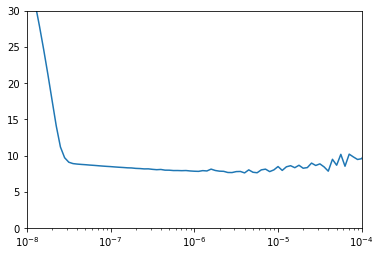

In [72]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [98]:
model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model.summary()
history = model.fit(dataset,epochs=50,verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                8704      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
_________________________________________________________________
lambda_10 (Lambda)           (None, 1)                 0         
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
38/38 [==============================] - 0s 11ms/step - loss: 139.5622 - mean_squared_error: 139.5622
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 139.2825 - mean_squared_error: 139.2825
Epoch 3/50
38/38 [======

In [ ]:
# creating submission file 
submission_pfs = model.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('sub_pfs.csv',index = False)

In [5]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop 
# That why we made shop_id and item_id our indices and date_block_num our column 
# the value we want is item_cnt_day and used sum as aggregating function 
dataset = sales_data.pivot_table(index = ['STOREID','PRODUCTID'],values = ['TARGET'])


In [6]:
# lets reset our indices, so that data should be in way we can easily manipulate
dataset.reset_index(inplace = True)

In [13]:
# lets check on our pivot table
print(dataset.head(5))

   STOREID  PRODUCTID     TARGET
0       12     141691  29.645456


In [9]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

KeyError: 'item_id'

In [13]:
# lets fill all NaN values with 0
dataset.fillna(0,inplace = True)
# lets check our data now 
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# we will drop shop_id and item_id because we do not need them
# we are teaching our model how to generate the next sequence 
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [16]:
# importing libraries required for our model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [17]:
# our defining our model 
my_model = Sequential()
my_model.add(LSTM(units = 64,input_shape = (33,1)))
my_model.add(Dropout(0.4))
my_model.add(Dense(1))

my_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
my_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
my_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 5s 16ms/step - loss: 15.7022 - mean_squared_error: 15.7022

In [20]:
# creating submission file 
submission_pfs = my_model.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('sub_pfs.csv',index = False)
